<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/PSO/notebooks/solutions/PSO_cv08_en_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Labs 8 - Morphological Operations II

In this exercise we will continue with morphological operations.

## Granulometry

We can open a binary image with increasingly larger structural elements and plot out the remaining area. This will give us information about the distribution of objects.

### Exercise 1 - Granulometry

Open the image `granulometria.png` and plot the area after opening with consecutively larger disk structural elements.

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/granulometria.png

--2023-11-06 16:17:41--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/granulometria.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5411 (5.3K) [image/png]
Saving to: ‘granulometria.png.1’

granulometria.png.1 100%[===================>]   5.28K  --.-KB/s    in 0s      

2023-11-06 16:17:41 (65.3 MB/s) - ‘granulometria.png.1’ saved [5411/5411]



In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

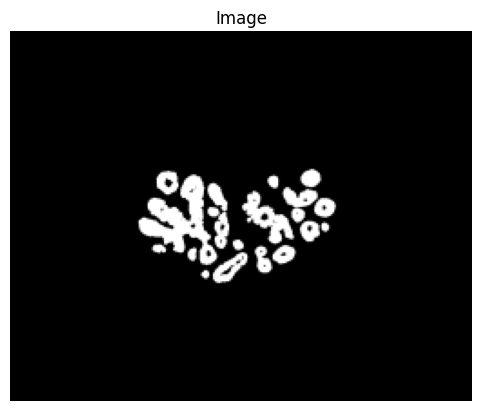

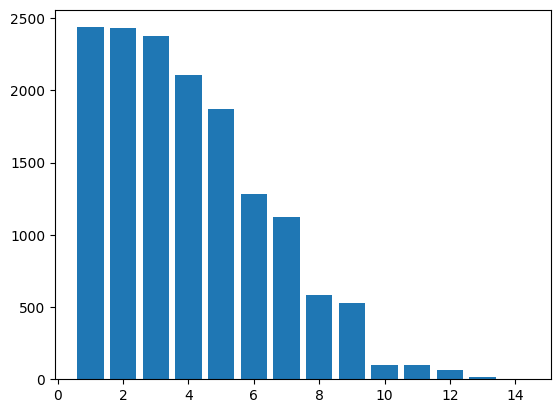

In [ ]:
img = cv2.imread('granulometria.png', cv2.IMREAD_GRAYSCALE)


plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Image")
plt.show()

ys = []

for i in range(1, 15):
  se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (i, i))
  img_processed = cv2.morphologyEx(img, cv2.MORPH_OPEN, se)
  ys.append(np.sum(img_processed) / 255)

plt.bar(range(1, 15), ys)
plt.show()

## Conditional Dilation

The image can be thresholded with two different thresholds. We thus obtain two images: $A$ for the higher threshold and $B$ for the lower one. Conditional dilation with structural element $SE$ is then defined as: $(A \oplus SE) \cap B$.

### Exercise 2 - Cells

Perform conditional dilation on the image `bunky.png`.

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/bunky.png

--2023-11-06 16:17:42--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/bunky.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 773473 (755K) [image/png]
Saving to: ‘bunky.png.1’

bunky.png.1         100%[===================>] 755.34K  4.06MB/s    in 0.2s    

2023-11-06 16:17:42 (4.06 MB/s) - ‘bunky.png.1’ saved [773473/773473]



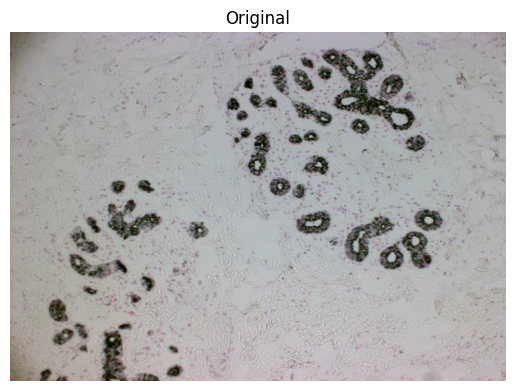

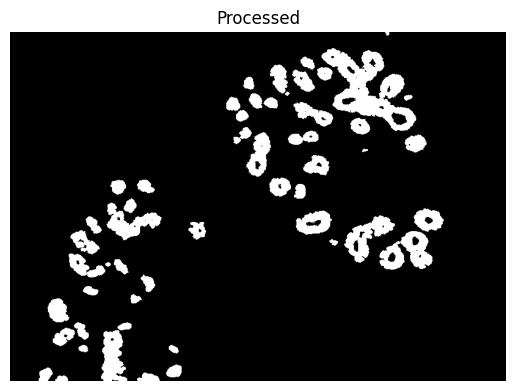

In [ ]:
img = 255 - cv2.imread('bunky.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(cv2.imread('bunky.png')[:, :, ::-1])
plt.axis('off')
plt.title("Original")
plt.show()

_, img_low = cv2.threshold(img, 100, 1, cv2.THRESH_BINARY)
_, img_high = cv2.threshold(img, 180, 1, cv2.THRESH_BINARY)

se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
img_dil = cv2.morphologyEx(img_high, cv2.MORPH_DILATE, se)

final_img = img_dil * img_low

plt.imshow(final_img, cmap='gray')
plt.axis('off')
plt.title("Processed")
plt.show()

## Grayscale morphology

For $f, h \colon \mathbb{R}^2 \to \mathbb{R}$ with finite support we define: $$f \oplus h = max\{ f(x-r, y-s) + h (r,s) | (r,s) \in supp(h)\}$$
and $$f \ominus h = min\{ f(x-r, y-s) - h (r,s) | (r,s) \in supp(h)\}.$$

We can use grayscale morphology to smooth an image by closing and opening it.

We can also calculate the gradient

$$grad(I) = \frac{(I \oplus SE) - (I \ominus SE)}{2}$$
  
$$grad(I) = I - (I \ominus SE)$$
  
$$grad(I) = (I \oplus SE) - I$$




### Exercise 3 - Grayscale Morphology

Test grayscale smoothing and gradient computation on the image of a building.

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/building.jpg

--2023-11-06 16:17:43--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/building.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57259 (56K) [image/jpeg]
Saving to: ‘building.jpg.1’

building.jpg.1      100%[===================>]  55.92K  --.-KB/s    in 0.04s   

2023-11-06 16:17:43 (1.26 MB/s) - ‘building.jpg.1’ saved [57259/57259]



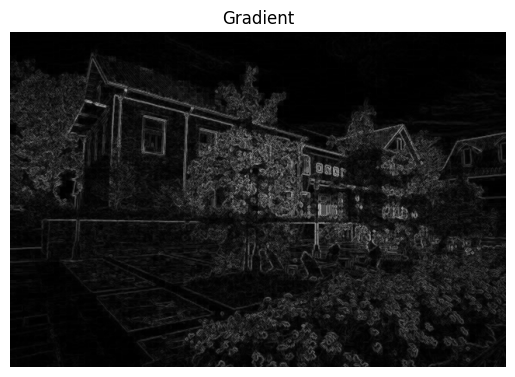

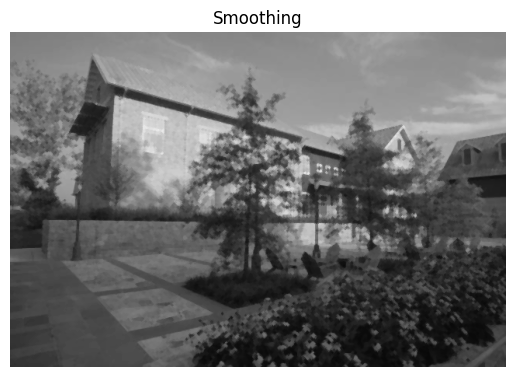

In [ ]:
img = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
plt.imshow(cv2.morphologyEx(img, cv2.MORPH_GRADIENT, se), cmap='gray', vmin=0, vmax=255)
plt.title("Gradient")
plt.axis("off")
plt.show()

img_closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, se)
plt.imshow(cv2.morphologyEx(img_closed, cv2.MORPH_OPEN, se), cmap='gray', vmin=0, vmax=255)
plt.title("Smoothing")
plt.axis("off")
plt.show()

## Tophat transformation

Tophat transformation is the difference of the original image and its opening. Bottomhat transformation is the difference of the closing of an image and its original.

### Exercise 4 - Contrast correction

We can increase the image contrast by adding the tophat transformation and subtracting the bottomhat transformation from the original. Try this on the dull landscape image. You can add and subtract even multiples of the transformed images for greater effect.

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/landscape_dull.png

--2023-11-06 16:17:44--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/landscape_dull.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1403462 (1.3M) [image/png]
Saving to: ‘landscape_dull.png.1’

landscape_dull.png. 100%[===================>]   1.34M  6.25MB/s    in 0.2s    

2023-11-06 16:17:45 (6.25 MB/s) - ‘landscape_dull.png.1’ saved [1403462/1403462]



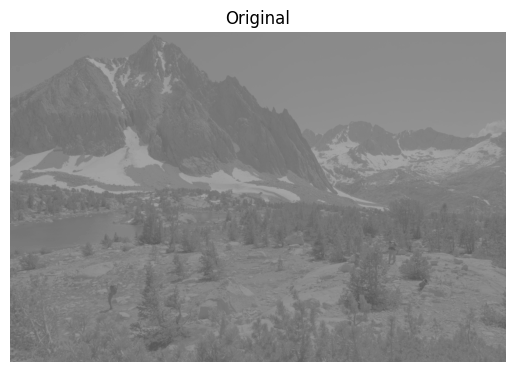

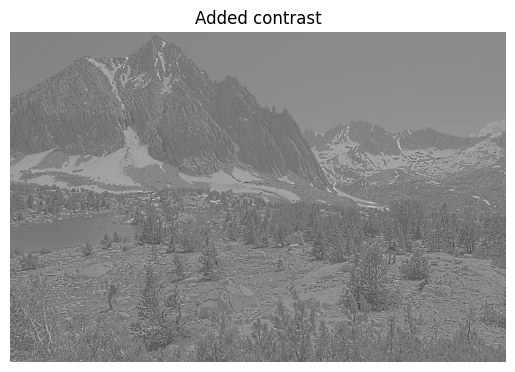

In [ ]:
img = cv2.imread('landscape_dull.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis("off")
plt.show()

se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

top = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, se)
bot = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, se)

img = img + 3 * top - 3 * bot

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Added contrast")
plt.axis("off")
plt.show()